In [220]:
#1A.

#import libraries
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

#load and generate descriptive statistics
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data.describe()


#Answer: 
#There are 5,110 entries/data points in this dataset. 
#The average age was 43, while the lowest was a baby under a year old, and the max was an 82 year old
#the ID & binary features had distorted statistics such as hypertension, heart disease, and stroke
#The average bmi was 28 while the highest bmi was 97, and bmi itself can be distorted with muscle mass & height
#There are some values missing for bmi

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [91]:
#1B
data.info()

#Answer:
#we can see there are 12 total features
#gender, marriage status, work type, and smoking status all have classes
#id, age, hyptertension, heart disease, average glucose levels, bmi, and stroke are all numerical values
#the difference, however, are some are binary while others are quantitative values - but this is not listed by dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


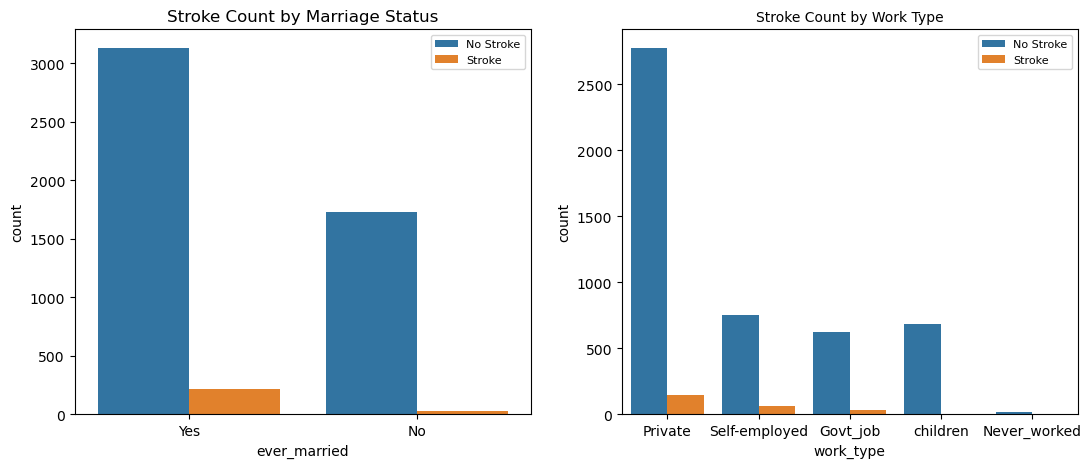

In [126]:
#2A.

#size of total figure 
plt.figure(figsize=(20,5))

#Stroke count by marriage
plt.subplot(1,3,1)
plt.title("Stroke Count by Marriage Status")
plt.ylabel("Count",fontsize=10)
plt.xlabel("Marriage Status",fontsize=10)
#we need seaborn's count plot to access number of binary options rather than quantity of their sum
sns.countplot(x=data["ever_married"],hue="stroke",data= data);
plt.legend(["No Stroke", "Stroke"],loc=1,prop={"size":8})



#Stroke count by work type
plt.subplot(1,3,2)
plt.title("Stroke Count by Work Type",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.xlabel("Work Type",fontsize=10)
sns.countplot(x=class_values["work_type"],hue="stroke",data=data);
plt.legend(["No Stroke", "Stroke"],loc=1,prop={"size":8})

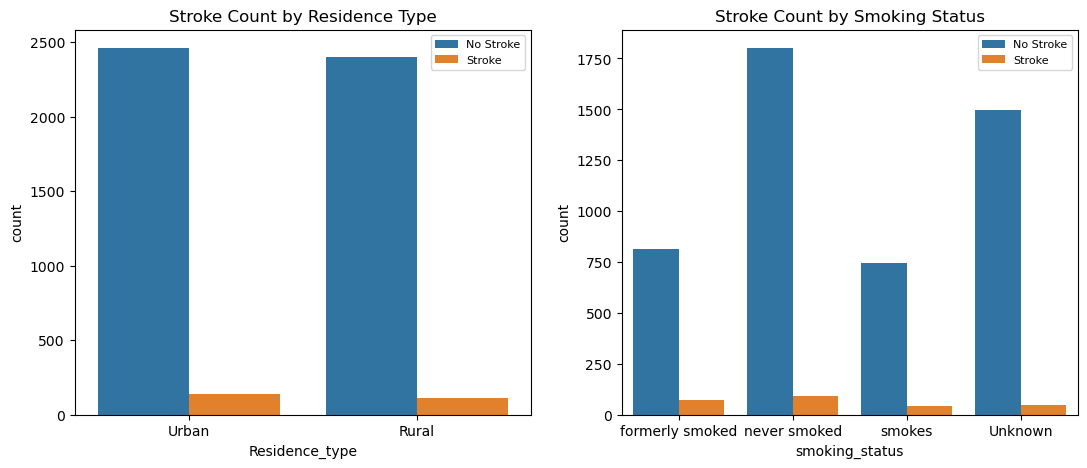

In [121]:
#2B.
#size of total figure 
plt.figure(figsize=(20,5))



#Stroke count by residence type
plt.subplot(1,3,1)
plt.title("Stroke Count by Residence Type")
plt.ylabel("Count",fontsize=10)
plt.xlabel("Residence Type",fontsize=10)
#we need seaborn's count plot to access number of binary options rather than quantity of their sum
sns.countplot(x=data["Residence_type"],hue="stroke",data= data);
plt.legend(["No Stroke", "Stroke"],loc=1,prop={"size":8})

#Stroke count by Smoking Status
plt.subplot(1,3,2)
plt.title("Stroke Count by Smoking Status")
plt.ylabel("Count",fontsize=10)
plt.xlabel("smoking_status",fontsize=10)
#we need seaborn's count plot to access number of binary options rather than quantity of their sum
sns.countplot(x=data["smoking_status"],hue="stroke", data= data);
plt.legend(["No Stroke", "Stroke"],loc=1,prop={"size":8})

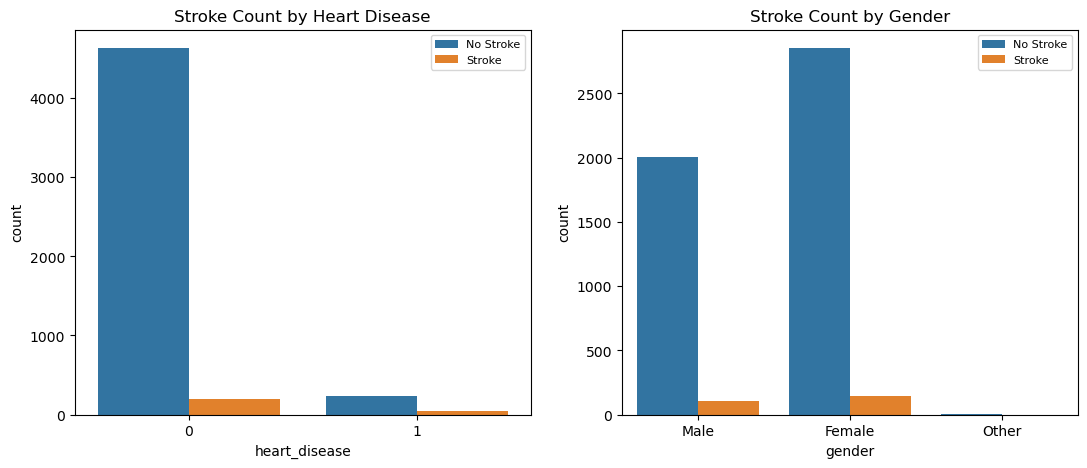

In [124]:
#2C.

plt.figure(figsize=(20,5))

#Stroke count by gender
plt.subplot(1,3,2)
plt.title("Stroke Count by Gender")
plt.ylabel("Count",fontsize=10)
plt.xlabel("Gender",fontsize=10)
#we need seaborn's count plot to access number of binary options rather than quantity of their sum
sns.countplot(x=data["gender"],hue="stroke",data= data);
plt.legend(["No Stroke", "Stroke"],loc=1,prop={"size":8})

#Stroke count by heart disease
plt.subplot(1,3,1)
plt.title("Stroke Count by Heart Disease")
plt.ylabel("Count",fontsize=10)
plt.xlabel("Heart Disease",fontsize=10)
#we need seaborn's count plot to access number of binary options rather than quantity of their sum
sns.countplot(x=data["heart_disease"],hue="stroke",data= data);
plt.legend(["No Stroke", "Stroke"],loc=1,prop={"size":8})

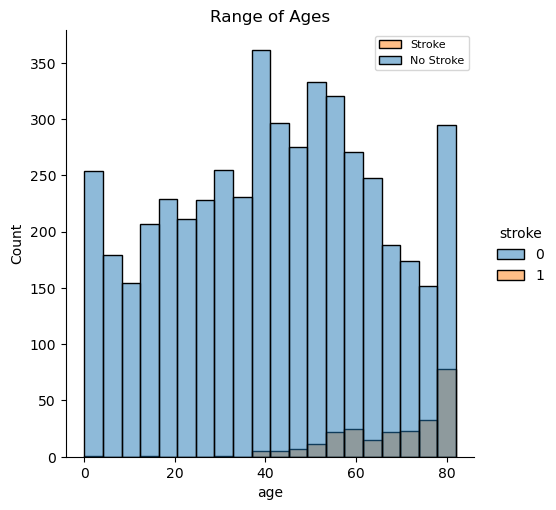

In [135]:
#3.

#create a seaborn distribution plot 
sns.displot(x = data["age"], hue = "stroke", data = data).set(
    title="Range of Ages");
plt.legend(["Stroke", "No Stroke"],loc=1,prop={"size":8})


[Text(0.5, 1.0, 'Probable Ages for a Stroke')]

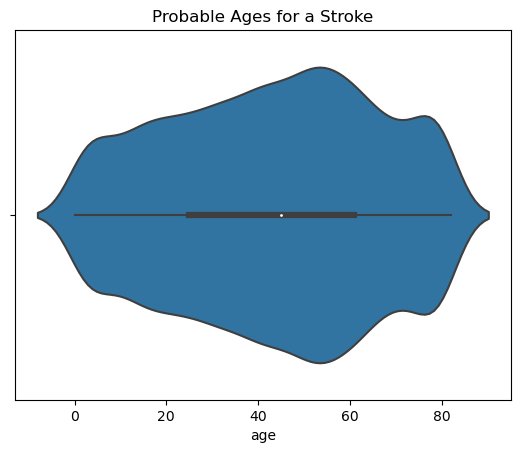

In [129]:
#4.

#Violin plot constructed to see probability of stroke 
sns.violinplot(x = data["age"], hue = "stroke", data = data).set(
    title="Probable Ages for a Stroke")

#Answer:
#Ages most likely to suffer from stroke: 25-65

In [ ]:
#5.

#Answer:
#We can see the dataset is only imbalanced with bmi as there are about 100 nan values in the column
#Besides this we see that there is an equal amount of 5110 datapoints in each column
#After imputation on bmi column it will go from unbalanced to balanced

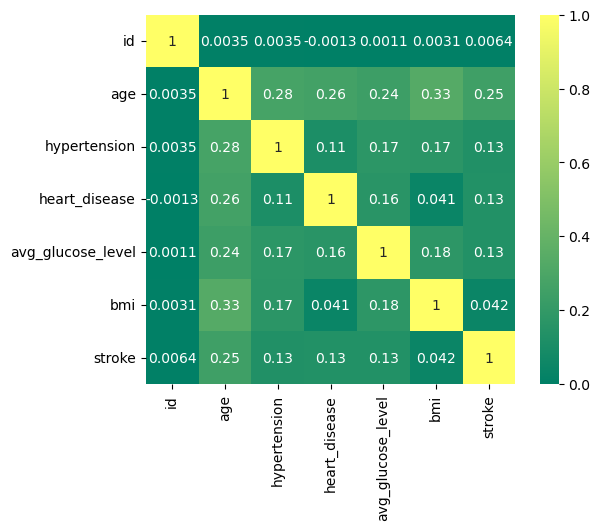

In [139]:
#6.

sns.heatmap(data.corr(),annot=True,cmap="summer",square=True)
plt.show()

#Answer:
#Using the Pearson Correlation Coefficient we can see the relationships between all features
#id: no correlation among other features ---> not a useful feature so we will leave it out of analysis
#age: strongest positive correlation

#age: weakest pos. corr = avg glucose level, strongest pos. corr = hypertension
#hypertension: weakest correlation is with heart disease, strongest pos. corr = age
#heart disease: weakest correlation is with hypertension, strongest pos. corr = age
#avg glucose level: weakest correlation is with stroke, strongest pos. corr = age
#bmi: weakest correlation is with hypertension, strongest pos. corr = avg glucose level
#stroke: weakest correlation is with hypertension, heart disease, and avg glucose level, strongest pos. corr = age


In [210]:
#7A.

#Lowered skewness of bmi from 1.05 to 0.22 using quantile based capping and flooring
print(data['bmi'].quantile(0.10))
print(data['bmi'].quantile(0.90))

#set the bmi to new range of values excluding outliers
data["bmi"] = np.where(data["bmi"] <19.7, 19.7,data['bmi'])
data["bmi"] = np.where(data["bmi"] >38.9, 38.9,data['bmi'])
print(data['bmi'].skew())

19.7
38.9
0.2262283839147163
91.88499999999999
145.24099999999999


In [212]:
#7B.

#outlier information: https://www.pluralsight.com/guides/cleaning-up-data-from-outliers

#Lowered skewness of avg glucose level from 1.57 to 0.46 by replacing outliers with median values
print(data['avg_glucose_level'].quantile(0.50)) 
print(data['avg_glucose_level'].quantile(0.95)) 

#set the avg_glucose_level to new range of values excluding outliers
data['avg_glucose_level'] = np.where(data['avg_glucose_level'] > 145, 92, data['avg_glucose_level'])

#print 
print(data['avg_glucose_level'].skew())




91.88499999999999
123.9455
0.45818375636798003


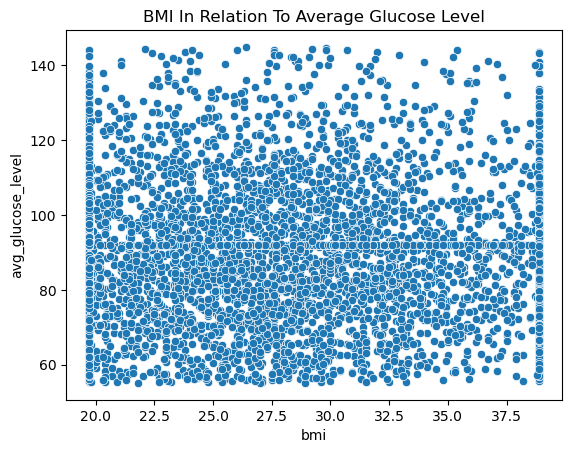

In [217]:
#7C.

#scatterplot of avg_glucose_level & bmi prove that there is a significant decrease in outliers
sns.scatterplot(data = data, x = data['bmi'], y = data['avg_glucose_level']).set(
title="BMI In Relation To Average Glucose Level");

In [229]:
#8

#Filled in bmi nan values with mean since there was no significant skew in the column data
data['bmi'].fillna(data['bmi'].mean())


0       36.600000
1       28.893237
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    28.893237
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

In [228]:
#9.

#Initialize labelE as labelEncoder()
labelE = LabelEncoder()

#Use labelE on all object dtypes 
data['gender'] = labelE.fit_transform(data['gender'])
data['ever_married'] = labelE.fit_transform(data['ever_married'])
data['work_type'] = labelE.fit_transform(data['work_type'])
data['Residence_type'] = labelE.fit_transform(data['Residence_type'])
data['smoking_status'] = labelE.fit_transform(data['smoking_status'])

#display data columns to see dtypes: * note the change from object to int64
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   int64  
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   int64  
 6   work_type          5110 non-null   int64  
 7   Residence_type     5110 non-null   int64  
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   int64  
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 479.2 KB
